# Monte Carlo Simulation for FE
## IEOR 4703

### American option pricing via simulation given the exercise boundary

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from BMS import BMS_price
from time import time

from IPython.display import clear_output

### Set parameters

In [2]:
r = 0.10
q = 0.01
s0 = 100
K = 100
sig = 0.40
tau = 1

### European option price

In [3]:
europeanPremium = BMS_price('put', s0, K, r, q, sig, tau)

### Load exercise boundary

In [5]:
exerciseBoundary = np.loadtxt('exerciseBoundaryPut.dat')

### Pricing via Simulation given the exercise boundary

In [6]:
m = 365
numPaths = 10000
dt = tau/m
s = np.zeros((m+1, numPaths))
t = np.linspace(0, 1, m+1) * tau

payoffs       = np.zeros(numPaths)
payoffs_early = np.zeros(numPaths)
indicators    = np.zeros(numPaths, dtype=int)

In [7]:
np.random.seed(456718)

st = time()
for j in range(numPaths):

    s[0,j]  = s0
    T = tau

    # reset the flag
    flag = 0

    for i in range(1, m+1):

        z = np.random.randn()
        s[i,j] = s[i-1,j] * np.exp( (r-q-sig*sig/2)*dt + sig*np.sqrt(dt)*z )

        #print(i,exerciseBoundary[i])

        if flag == 0 and s[i,j] < exerciseBoundary[i]:

            # exercise & discount according to the time of exercise
            # payoffs_early[j] = np.exp(-r*tau)*(K - s[i,j])
            payoffs_early[j] = np.exp(-r*i*dt)*(K - s[i,j])

            # turn the flag on
            flag = 1

        if i == m:
            payoffs[j] = np.exp(-r*tau) * np.maximum(K - s[i,j], 0)

    if flag == 0:
        payoffs_early[j] = payoffs[j]
        indicators[j] = 1

et = time()
print('Number of simulations: %i' % numPaths)
print('Elapsed time was %f seconds.' % (et-st))

# simulation output
european = np.mean(payoffs)
american = np.mean(payoffs_early)

print('European price (BSM): %f' % europeanPremium)
print('European price (Sim): %f' % european)
print('American price (Sim): %f' % american)

Number of simulations: 10000
Elapsed time was 20.585497 seconds.
European price (BSM): 11.131433
European price (Sim): 11.221362
American price (Sim): 12.266012


### Plot a few paths against the exercise boundary (visualization purposes)

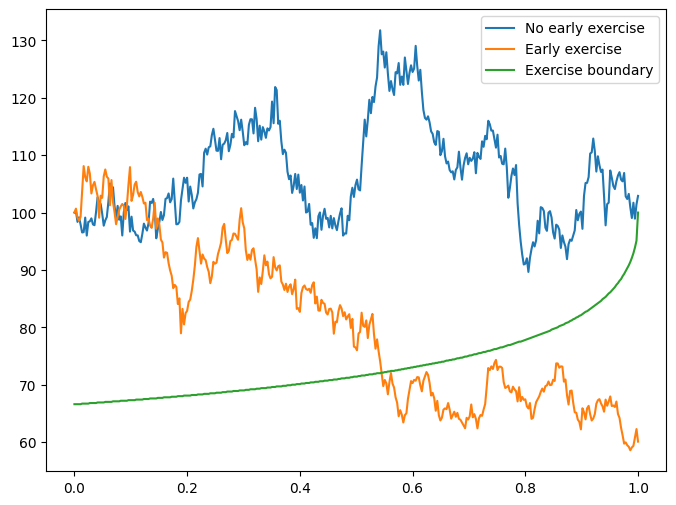

In [8]:
tmp1 = np.where(indicators == 1)
tmp2 = np.where(indicators == 0)

for i in range(30):
    clear_output(wait=True)
    plt.figure(figsize=(8, 6))
    plt.plot(t, s[:, tmp1[0][i]])
    plt.plot(t, s[:, tmp2[0][i]])
    plt.plot(t, exerciseBoundary)
    plt.legend(['No early exercise', 'Early exercise', 'Exercise boundary'])
    plt.show()